## Objective functions for classification

### Formulation of classififcation task

Suppose, that we have linear classification model:
    $$a(x) = sign( \langle w,x  \rangle +w_0) =  sign(\sum_{j=1}^{d}w_jx_j+w_0)$$

Our goal is to have as many correct answers as possible:
    $$\frac{1}{l}\sum_{i=1}^{l}[a(x_i)=y_i]\to max_w$$
What is equivalent to:
$$\frac{1}{l}\sum_{i=1}^{l}[y_i  \langle w,x_i  \rangle <0]\to min_w$$

This functional is discrete, we cannot optimize it with gradient methods, therefore we will optimize its upper bound:
$$\frac{1}{l}\sum_{i=1}^{l}L(y_i  \langle w,x_i  \rangle <0)\to min_w,$$

where $y_i  \langle w,x_i  \rangle$ -- margin, distance from the separating hyperplane to the sample.

### Objective functions

$L(\dots)$ can be:
- [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
    
$$L=\log(1+\exp(-M))$$
    
```python
sklearn.linear_model.LogisticRegression
```
---

- [SVM (Hinge loss)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
    
$$L=\log(1 - M)_+=max(0, 1-M)$$
    
```python
sklearn.svm.SVC
```
---

- [Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)
    
$$L=(- M)_+=max(0, -M)$$
    
```python
sklearn.linear_model.Perceptron
```

- Exponential
    
$$L=exp(-M)$$
    
- Sigmoidal

$$L=\frac{1}{(1+exp(M))}$$

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve, validation_curve
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [12]:
df = pd.read_csv('../Data/wisconsin_cancer.data', header=None)

X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values

enc = LabelEncoder()
y = enc.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

pipe_lr = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)), ('lr', LogisticRegression(random_state=17))]) 
pipe_lr.fit(X_train, y_train)

y_pred = pipe_lr.predict(X_test)
y_score = pipe_lr.decision_function(X_test)

**ROC-curve**

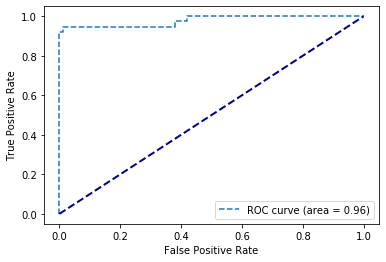

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_score)
plt.plot(fpr, tpr, linestyle='--', label='ROC curve (area = %0.2f)' % roc_auc_score(y_true=y_test, y_score=y_pred))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

**Precision recall curve**

In [9]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.98


0.9756956888535834


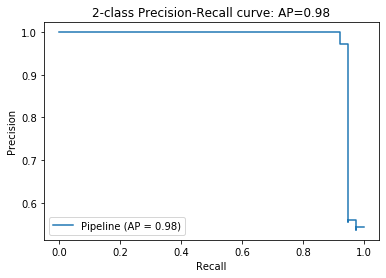

In [10]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(pipe_lr, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                    'AP={0:0.2f}'.format(average_precision))

print(average_precision)